In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'EasyVisa.csv')

In [4]:
df.shape

(25480, 12)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [7]:
df.drop('case_id', axis=1, inplace=True, errors='ignore')

In [8]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [9]:
from datetime import date

todays_date = date.today()
current_year = todays_date.year

In [10]:
current_year

2025

In [11]:
df['company_age'] = df['yr_of_estab'].apply(lambda x: current_year - x)

In [12]:
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,17
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,19
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,115
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,138


In [13]:
df.drop('yr_of_estab', inplace=True, axis = 1)

In [14]:
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,20
...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,South,77092.5700,Year,Y,Certified,17
25476,Asia,High School,Y,N,3274,Northeast,279174.7900,Year,Y,Certified,19
25477,Asia,Master's,Y,N,1121,South,146298.8500,Year,N,Certified,115
25478,Asia,Master's,Y,Y,1918,West,86154.7700,Year,Y,Certified,138


In [15]:
num_feat = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_feat = [feature for feature in df.columns if df[feature].dtype == 'O']
disc_feat = [feature for feature in num_feat if len(df[feature].unique()) <= 25]
cont_feat = [feature for feature in num_feat if len(df[feature].unique()) > 25]

In [16]:
X, y = df.drop('case_status', axis = 1), df['case_status']

In [17]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,20


In [18]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [19]:
y = np.where(y == 'Denied', 1, 0)

In [20]:
y

array([1, 0, 1, ..., 0, 0, 0], shape=(25480,))

## Feature Transformation

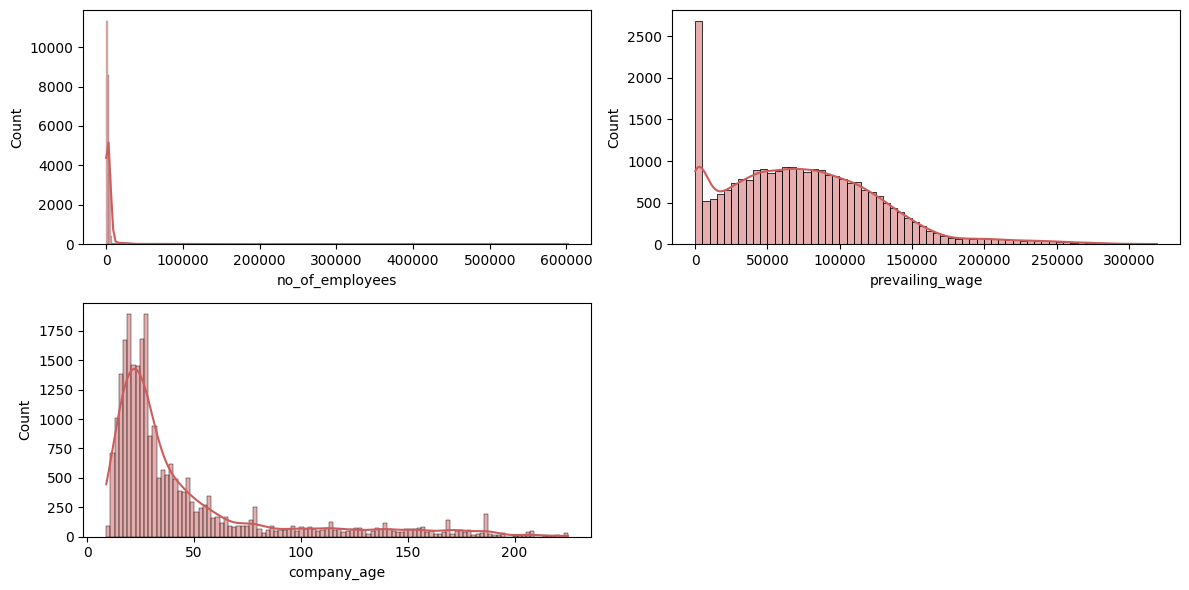

In [21]:
plt.figure(figsize = (12, 6))

for i, col in enumerate(['no_of_employees', 'prevailing_wage', 'company_age']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(X[col], color='indianred', kde=True)
    plt.xlabel(col)
    plt.tight_layout()
    
plt.show()

In [22]:
X[cont_feat].skew(axis = 0, skipna = True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [23]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson')
transform_feature = ['company_age', 'no_of_employees']
X_copy = pt.fit_transform(X[transform_feature])

In [24]:
X_copy = pd.DataFrame(X_copy, columns=transform_feature)

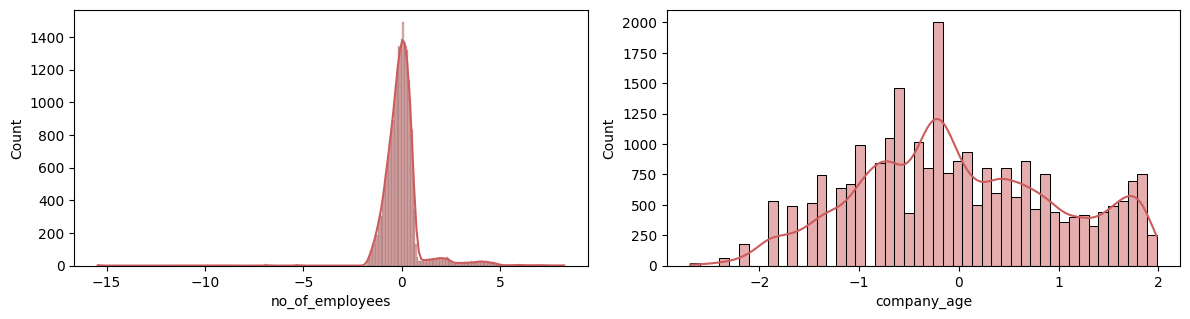

In [25]:
plt.figure(figsize = (12, 6))

for i, col in enumerate(['no_of_employees', 'company_age']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(X_copy[col], color='indianred', kde=True)
    plt.xlabel(col)
    plt.tight_layout()
    
plt.show()

In [26]:
X_copy.skew(axis = 0, skipna = True)


company_age        0.112260
no_of_employees    0.399339
dtype: float64

In [27]:
for feature in cat_feat:
     print(feature, ' -> ', df[feature].nunique())

continent  ->  6
education_of_employee  ->  4
has_job_experience  ->  2
requires_job_training  ->  2
region_of_employment  ->  5
unit_of_wage  ->  4
full_time_position  ->  2
case_status  ->  2


In [28]:
num_feat = list(X.select_dtypes(exclude='object').columns)

In [29]:
num_feat

['no_of_employees', 'prevailing_wage', 'company_age']

In [30]:
X.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position', 'company_age'],
      dtype='object')

## Preprocessing using Column Transformer

In [31]:
ordinal_columns = ['has_job_experience', 'requires_job_training', 'full_time_position', 'education_of_employee']
onehot_columns = ['continent', 'unit_of_wage', 'region_of_employment']
transform_columns = transform_feature

In [32]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [33]:
scaler = StandardScaler()
oh_encoder = OneHotEncoder()
ord_encoder = OrdinalEncoder()

pipeline = Pipeline(
    steps = [('transformer', PowerTransformer(method='yeo-johnson'))]
)

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_encoder, onehot_columns),
        ('OrdinalEncoder', ord_encoder, ordinal_columns),
        ('Transformer', pipeline, transform_columns),
        ('StandardScaler', scaler, num_feat)
    ]
)

In [34]:
X = preprocessor.fit_transform(X)

In [35]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]], shape=(25480, 24))

## Classification

In [36]:
from imblearn.combine import SMOTETomek, SMOTEENN

smt = SMOTEENN(random_state = 42, sampling_strategy = 'minority')

X_res, y_res = smt.fit_resample(X, y)

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((13629, 24), (3408, 24))

In [45]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score, roc_curve               
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [46]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return acc, f1, precision, recall, roc_auc

In [47]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "XGBClassifier": XGBClassifier(),
    "Logistic Regression": LogisticRegression(),
    "CatBoosting Classifier": CatBoostClassifier(verbose = False)    
}

In [60]:
def evaluate_models(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)
    
    models_list = []
    accuracy_list = []
    auc = []    
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)
        
        # Make Prediction
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Train set Performance
        train_acc, train_f1, train_prec, train_reca, train_roc = evaluate_clf(y_train, y_train_pred)
        
        # Test set Performance
        test_acc, test_f1, test_prec, test_reca, test_roc = evaluate_clf(y_test, y_test_pred)
        
        #Print all the scores both for test and train
        print(f"Model: {list(models.keys())[i]}")

        print("Train Metrics:")
        print(f"  Accuracy : {train_acc:.4f}")
        print(f"  F1 Score : {train_f1:.4f}")
        print(f"  Precision: {train_prec:.4f}")
        print(f"  Recall   : {train_reca:.4f}")
        print(f"  ROC-AUC  : {train_roc:.4f}")

        print(". " * 30)

        print("\nTest Metrics:")
        print(f"  Accuracy : {test_acc:.4f}")
        print(f"  F1 Score : {test_f1:.4f}")
        print(f"  Precision: {test_prec:.4f}")
        print(f"  Recall   : {test_reca:.4f}")
        print(f"  ROC-AUC  : {test_roc:.4f}")
        
        print("=" * 60)
        print('\n\n')
        
        models_list.append(list(models.keys())[i])
        accuracy_list.append(test_acc)
        auc.append(test_roc)
        
    report = pd.DataFrame(list(zip(models_list, accuracy_list)), columns = ['Model Name', 'Accuracy'])\
                .sort_values(by = 'Accuracy', ascending = False)   
                
    return report

In [61]:
base_model_report = evaluate_models(X=X_res, y = y_res, models = models)

Model: Random Forest
Train Metrics:
  Accuracy : 1.0000
  F1 Score : 1.0000
  Precision: 1.0000
  Recall   : 1.0000
  ROC-AUC  : 1.0000
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Test Metrics:
  Accuracy : 0.9525
  F1 Score : 0.9562
  Precision: 0.9520
  Recall   : 0.9603
  ROC-AUC  : 0.9518



Model: Decision Tree
Train Metrics:
  Accuracy : 1.0000
  F1 Score : 1.0000
  Precision: 1.0000
  Recall   : 1.0000
  ROC-AUC  : 1.0000
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Test Metrics:
  Accuracy : 0.9252
  F1 Score : 0.9311
  Precision: 0.9254
  Recall   : 0.9370
  ROC-AUC  : 0.9242



Model: AdaBoost Classifier
Train Metrics:
  Accuracy : 0.8538
  F1 Score : 0.8644
  Precision: 0.8647
  Recall   : 0.8640
  ROC-AUC  : 0.8530
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

Test Metrics:
  Accuracy : 0.8492
  F1 Score : 0.8609
  Precision: 0.8576
  Recall   : 0.8641
  ROC-AUC  : 0.8479



Model: Gradient Boosting
Train Metrics:
  Accurac

In [62]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.952465
4,KNN Classifier,0.941608
6,XGBClassifier,0.935153
8,CatBoosting Classifier,0.928697
1,Decision Tree,0.925176
3,Gradient Boosting,0.879108
5,Support Vector Classifier,0.857101
2,AdaBoost Classifier,0.849178
7,Logistic Regression,0.725646


In [63]:
base_model_report[:3]

,Model Name,Accuracy
0,Random Forest,0.952465
4,KNN Classifier,0.941608
6,XGBClassifier,0.935153


## Hyper Parameter Tuning